# NILMTK Rapid Experimentation API

### This notebook demonstrates the use of NILMTK's ExperimentAPI - a  new  NILMTK  interface which  allows NILMTK users to focus on which experiments to run rather than on the code required to run such experiments.

It is important to note that handing over so much flexibility to the user does require the user to be somewhat familiar with the data set, but this part of the process is supported by NILMTK as data exploration is simple and well documented. 

Lets us start with a very simple experiment to demonstrate the use of the API for multiple appliances in a minimal use case. This experiment shows how the user can select the appliances in the dataset on which disaggregation is to be performed.

Importing the API. 

In [1]:
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

Next, we import the required algorithms on which we wish to run the experiments

In [2]:
from nilmtk.disaggregate import CO

Next, we enter the values for the different parameters in the dictionary. Since we need multiple appliances, we enter the names of all the required appliances in the _'appliances'_ parameter.

In [3]:
experiment1 = {
  'power': {'mains': ['apparent','active'],'appliance': ['apparent','active']},
  'sample_rate': 60,
  'appliances': ['fridge', 'microwave'],
  'methods': {"CO":CO({})},
  'train': {    
    'datasets': {
        'Dataport': {
            'path': 'C:/Users/davwang/Desktop/nilmtk-contrib/dataset/redd.hdf5',
            'buildings': {
                3: {
                    'start_time': '2011-04-17',
                    'end_time': '2011-04-27'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'Dataport': {
            'path': 'C:/Users/davwang/Desktop/nilmtk-contrib/dataset/redd.hdf5',
            'buildings': {
                3: {
                     'start_time': '2011-04-17',
                     'end_time': '2011-04-27'
                    }
                }
            }
        },
        'metrics':['rmse']
    }
}

In this example experimental setup, we have set the _sample rate_ at 60Hz and use Combinatorial Optimisation to 
disaggregate the required appliances from building 10 in the dataport dataset with the _RMSE_ metric to measure the accuracy. We also specify the dates for training and testing

Next we provide this experiment dictionary as input to the API.

Joint Testing for all algorithms
Loading data for  Dataport  dataset
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  rmse  ..............wave'
                   CO
fridge     157.384382
microwave  448.421380


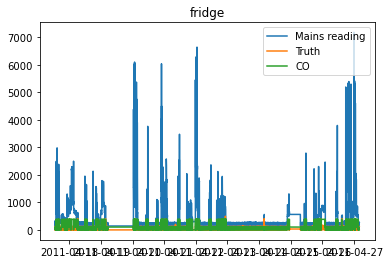

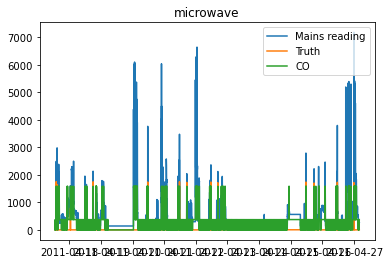

In [4]:
api_results_experiment_1 = API(experiment1)

We can observe the prediction vs. truth graphs in the above cell. The accuracy metrics can be accessed using the following commands:

In [5]:
errors_keys = api_results_experiment_1.errors_keys
errors = api_results_experiment_1.errors
for i in range(len(errors)):
    print (errors_keys[i])
    print (errors[i])
    print ("\n\n")

Dataport_3_rmse
                   CO
fridge     157.384382
microwave  448.421380





This was a trivial experiment that only scratches the surface of the true potential of this API.

In the next experiment we will run an incrementally more complex version of the above experiment. Here we will use multiple models to disaggregate the appliance readings with the models having their own sets of parameters which can be set by the users within the experimental dictionary in order to fine tune experiments.

We also import the required algorithms for the next experiments

In [6]:
from nilmtk.disaggregate import FHMMExact, Mean

In [7]:
experiment2 = {
  'power': {'mains': ['apparent','active'],'appliance': ['apparent','active']},
  'sample_rate': 60,
  'appliances': ['fridge', 'microwave'],
  'methods': {"Mean":Mean({}),"FHMM_EXACT":FHMMExact({'num_of_states':2}), "CombinatorialOptimisation":CO({})},
  'train': {    
    'datasets': {
        'Dataport': {
            'path': 'C:/Users/davwang/Desktop/nilmtk-contrib/dataset/redd.hdf5',
            'buildings': {
                3: {
                    'start_time': '2011-04-17',
                    'end_time': '2011-04-27'
                    }
                }
            }
        }
    },
  'test': {
    'datasets': {
        'Datport': {
            'path': 'C:/Users/davwang/Desktop/nilmtk-contrib/dataset/redd.hdf5',
            'buildings': {
                3: {
                    'start_time': '2011-04-17',
                    'end_time': '2011-04-27'
                    }
                }
            }
        },
        'metrics':['mae', 'rmse']
    }
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Generating predictions for : Mean
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  mae  ..............owave'
                Mean  FHMM_EXACT  CombinatorialOptimisation
fridge     50.981560   75.705338                 128.510330
microwave  10.381143   59.150211                 246.916504
............  rmse  ..............
                Mean  FHMM_EXACT  CombinatorialOptimisation
fridge     59.791359   86.907222                 158.799119
microwave  82.009452  105.260373                 447.769838


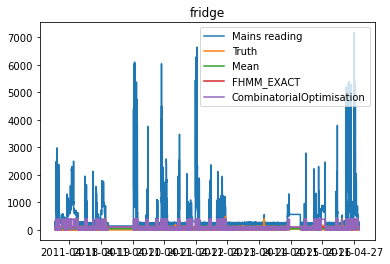

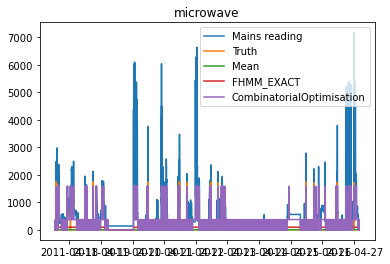

In [8]:
api_results_experiment_2 = API(experiment2)

In [9]:
api_results_experiment_2.errors

[                Mean  FHMM_EXACT  CombinatorialOptimisation
 fridge     50.981560   75.705338                 128.510330
 microwave  10.381143   59.150211                 246.916504,
                 Mean  FHMM_EXACT  CombinatorialOptimisation
 fridge     59.791359   86.907222                 158.799119
 microwave  82.009452  105.260373                 447.769838]

In [10]:
errors_keys = api_results_experiment_2.errors_keys
errors = api_results_experiment_2.errors
for i in range(len(errors)):
    print (errors_keys[i])
    print (errors[i])
    print ("\n\n")

Datport_3_mae
                Mean  FHMM_EXACT  CombinatorialOptimisation
fridge     50.981560   75.705338                 128.510330
microwave  10.381143   59.150211                 246.916504



Datport_3_rmse
                Mean  FHMM_EXACT  CombinatorialOptimisation
fridge     59.791359   86.907222                 158.799119
microwave  82.009452  105.260373                 447.769838





The API makes running experiments extremely quick and efficient, with the emphasis on creating finely tuned reproducible experiments where model and parameter performances can be easily evaluated at a glance.   

In the next iteration of this experiment, we introduce more parameters _chunksize_, _DROP_ALL_NANS_ and _artificial_aggregate_ and add another disaggregation algorithm (_Hart85_). We also train and test data from multiple buildings of the same dataset.

We also import the Hart algorithm for the next experiment

In [11]:
from nilmtk.disaggregate import Hart85

In [12]:
experiment3 = {
  'power': {'mains': ['apparent','active'],'appliance': ['apparent','active']},
  'sample_rate': 60,
  'appliances': ['fridge','electric furnace','washing machine'],
  'artificial_aggregate': True,
  'chunksize': 20000,
  'DROP_ALL_NANS': False,
  'methods': {"Mean":Mean({}), "FHMM_EXACT":FHMMExact({'num_of_states':2}), "CO":CO({})},
  'train': {    
    'datasets': {
      'Dataport': {
        'path': 'C:/Users/davwang/Desktop/nilmtk-contrib/dataset/redd.hdf5',
        'buildings': {
          3: {
            'start_time': '2011-04-17',
            'end_time': '2011-04-27'
          },
          3: {
            'start_time': '2011-04-17',
            'end_time': '2011-04-27'
          },
          3: {
            'start_time': '2011-04-17',
            'end_time': '2011-04-27'
          },
                }                
            }
        }
    },
  'test': {
    'datasets': {
      'Datport': {
        'path': 'C:/Users/davwang/Desktop/nilmtk-contrib/dataset/redd.hdf5',
        'buildings': {
          3: {
            'start_time': '2011-04-17',
            'end_time': '2011-04-27'
          },
          3: {
            'start_time': '2011-04-17',
            'end_time': '2011-04-27'
          },
          3: {
            'start_time': '2011-04-17',
            'end_time': '2011-04-27'
          },
        }
      }
    },
        'metrics':['mae', 'rmse']
    }
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=14, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Creating an Artificial Aggregate
Generating predictions for : Mean
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  mae  ..............ing machine''
                        Mean  FHMM_EXACT         CO
fridge             50.981560   35.545143  15.948423
electric furnace   32.915745   48.007332  24.861839
washing machine   143.389694   65.305092  30.992126
............  rmse  ..............
                        Mean  FHMM_EXACT          CO
fridge             59.791359   65.145192   52.088616
electric furnace  103.271336  115.518828  101.468764
washing machine  

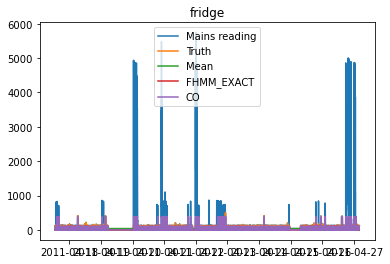

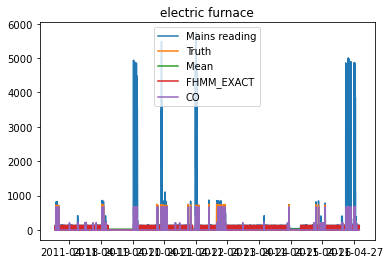

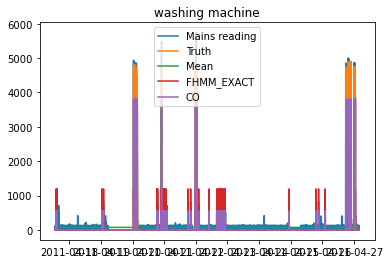

In [13]:
api_results_experiment_3 = API(experiment3)

In [14]:
errors_keys = api_results_experiment_3.errors_keys
errors = api_results_experiment_3.errors
for i in range(len(errors)):
    print (errors_keys[i])
    print (errors[i])
    print ("\n\n")

Datport_3_mae
                        Mean  FHMM_EXACT         CO
fridge             50.981560   35.545143  15.948423
electric furnace   32.915745   48.007332  24.861839
washing machine   143.389694   65.305092  30.992126



Datport_3_rmse
                        Mean  FHMM_EXACT          CO
fridge             59.791359   65.145192   52.088616
electric furnace  103.271336  115.518828  101.468764
washing machine   506.628439  381.418303  166.269137





The results of the above experiment are presented for every chunk per building in the test set.

In the following experiment, we demonstrate how to run experiments across datasets, which was previously not possible. The important thing to pay attention to is that such datasets can only be trained and tested together as long as they have common appliances in homes with common _ac_types_.

In [15]:
experiment4 = {
  'power': {'mains': ['apparent','active'],'appliance': ['apparent','active']},
  'sample_rate': 60,
  'appliances': ['washing machine','fridge'],
  'artificial_aggregate': True,
  'chunksize': 20000,
  'DROP_ALL_NANS': False,
  'methods': {"Mean":Mean({}), "FHMM_EXACT":FHMMExact({'num_of_states':2}), 'CO':CO({})},
  'train': {
    'datasets': {
      'UKDALE': {
        'path': 'C:/Users/davwang/Desktop/nilmtk-contrib/dataset/redd.hdf5',
        'buildings': {
              1: {
                'start_time': '2011-04-17',
                'end_time': '2011-04-27'
              },          
            }
          },        
        }
      },    
  'test': {
    'datasets': {
      'DRED': {
        'path': 'C:/Users/davwang/Desktop/nilmtk-contrib/dataset/redd.hdf5',
        'buildings': {
              1: {
                    'start_time': '2011-04-17',
                    'end_time': '2011-04-27'
          }
        }
      },
      'REDD': {
        'path': 'C:/Users/davwang/Desktop/nilmtk-contrib/dataset/redd.hdf5',
        'buildings': {
              1: {
                    'start_time': '2011-04-17',
                    'end_time': '2011-04-27'
          }
        }
      }
    },
        'metrics':['mae', 'rmse']
    }
}

Joint Testing for all algorithms
Loading data for  DRED  dataset
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Creating an Artificial Aggregate
Generating predictions for : Mean
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  mae  ..............ge' machine'
                      Mean  FHMM_EXACT         CO
washing machine  46.166122   21.341022   3.971665
fridge           70.489273    7.391503  10.860315
............  rmse  ..............
                       Mean  FHMM_EXACT         CO
washing machine  236.713038  203.284063  45.453893
fridge            84.527897   37.221446  29.633457
Loading data for  REDD  dataset
Loading data for meter ElecMeterID(instance=2, buildi

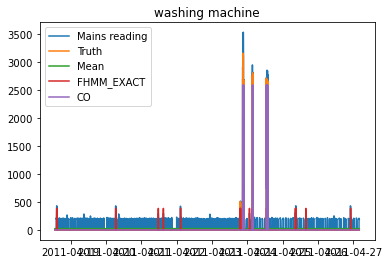

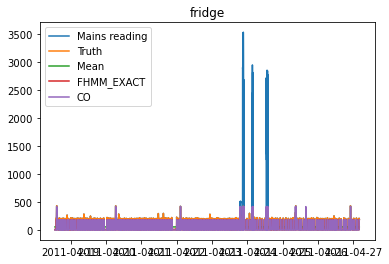

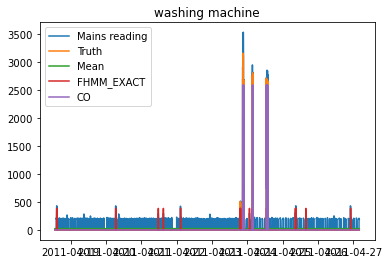

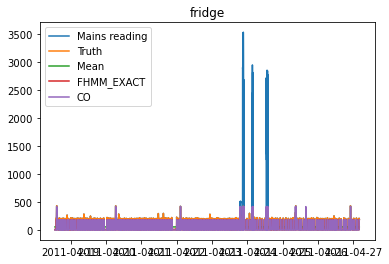

In [16]:
api_results_experiment_4 = API(experiment4)

In [17]:
errors_keys = api_results_experiment_4.errors_keys
errors = api_results_experiment_4.errors
for i in range(len(errors)):
    print (errors_keys[i])
    print (errors[i])
    print ("\n\n")

DRED_1_mae
                      Mean  FHMM_EXACT         CO
washing machine  46.166122   21.341022   3.971665
fridge           70.489273    7.391503  10.860315



DRED_1_rmse
                       Mean  FHMM_EXACT         CO
washing machine  236.713038  203.284063  45.453893
fridge            84.527897   37.221446  29.633457



REDD_1_mae
                      Mean  FHMM_EXACT         CO
washing machine  46.166122   21.341022   3.971665
fridge           70.489273    7.391503  10.860315



REDD_1_rmse
                       Mean  FHMM_EXACT         CO
washing machine  236.713038  203.284063  45.453893
fridge            84.527897   37.221446  29.633457





Just like the above experiments, any user can set up other experiments very quickly. 